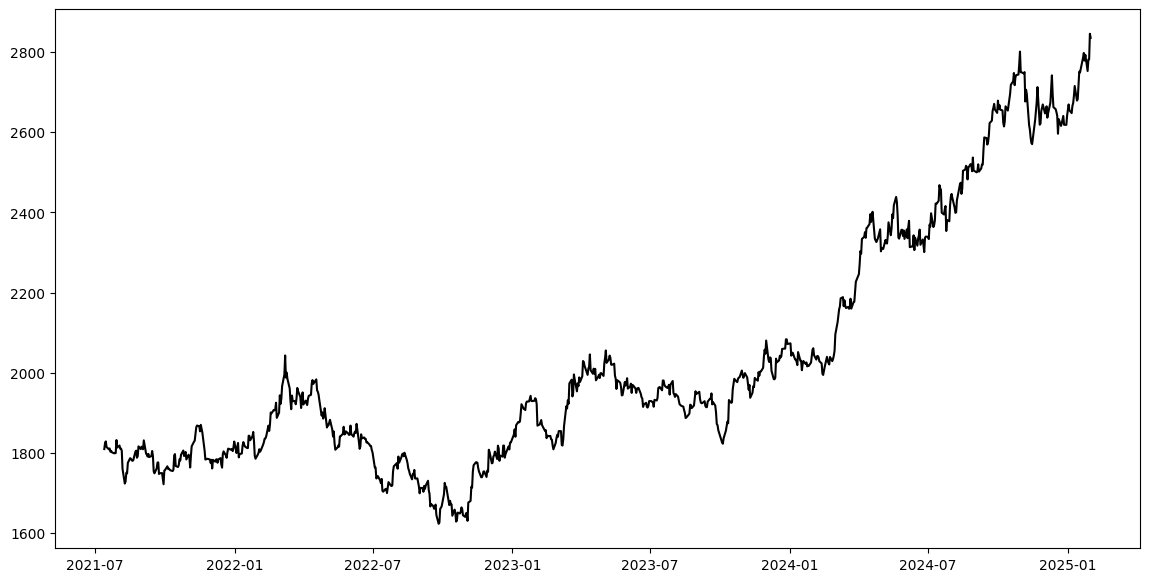

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Ensure F is imported for activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# Load and prepare data
df = pd.read_csv('Gold Futures Historical Data_3Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')


# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Window width
window_width = 30  # Adjusted window width for experimentation

# Data scaling (scale each feature individually)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)



# Prepare sequences and corresponding dates
X, y_full, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y_full.append(data_scaled[i, 0])  # Assuming 'Price' is the target
    dates.append(df['Date'].iloc[i])

X = np.array(X)
y_full = np.array(y_full)
dates = np.array(dates)


# Define the inverse_transform function globally
def inverse_transform(y_scaled):
    """
    Inverse transform the scaled 'Price' values back to the original scale.
    Assumes that the scaler was fit on all features.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    # Create a placeholder for other features with zeros
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]


# At the end of the full-set original price cell, after plotting:
full_dates = dates        # Save the original full-set dates (e.g. shape (N_full,))
full_actual = inverse_transform(y_full)   # Save the actual price curve (e.g. shape (N_full,))


# Plotting the full dataset with predictions over validation and test sets only
plt.figure(figsize=(14, 7))

#all_prices_inv_full = scaler.inverse_transform(data_scaled)[:, 0]
#plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')

# Actual Price
plt.plot(dates, full_actual, color='black', label='Actual Price')




Training (with validation) and fine-tuning for neural model: LSTM
[LSTM] Epoch 1/1500, Train Loss: 0.012806, Val Loss: 0.005501
[LSTM] Epoch 100/1500, Train Loss: 0.000235, Val Loss: 0.000373
[LSTM] Epoch 200/1500, Train Loss: 0.000179, Val Loss: 0.000277
Early stopping triggered
[LSTM] Early stopping at epoch 289


/tmp/ipykernel_1586022/137851539.py:221: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))



Training (with validation) and fine-tuning for neural model: GRU
[GRU] Epoch 1/1500, Train Loss: 0.012302, Val Loss: 0.022176
[GRU] Epoch 100/1500, Train Loss: 0.000188, Val Loss: 0.000383
[GRU] Epoch 200/1500, Train Loss: 0.000165, Val Loss: 0.000266
Early stopping triggered
[GRU] Early stopping at epoch 291


/tmp/ipykernel_1586022/137851539.py:221: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))



Training (with validation) and fine-tuning for neural model: RNN
[RNN] Epoch 1/1500, Train Loss: 0.008053, Val Loss: 0.005188
[RNN] Epoch 100/1500, Train Loss: 0.000250, Val Loss: 0.000339
[RNN] Epoch 200/1500, Train Loss: 0.000244, Val Loss: 0.000483
[RNN] Epoch 300/1500, Train Loss: 0.000171, Val Loss: 0.000297
Early stopping triggered
[RNN] Early stopping at epoch 352


/tmp/ipykernel_1586022/137851539.py:221: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))



Training (with validation) and fine-tuning for neural model: CNN
[CNN] Epoch 1/1500, Train Loss: 0.007063, Val Loss: 0.010078
[CNN] Epoch 100/1500, Train Loss: 0.000601, Val Loss: 0.001086
[CNN] Epoch 200/1500, Train Loss: 0.000399, Val Loss: 0.000838
[CNN] Epoch 300/1500, Train Loss: 0.000261, Val Loss: 0.000361
[CNN] Epoch 400/1500, Train Loss: 0.000110, Val Loss: 0.000426
[CNN] Epoch 500/1500, Train Loss: 0.000170, Val Loss: 0.000528
Early stopping triggered
[CNN] Early stopping at epoch 586


/tmp/ipykernel_1586022/137851539.py:221: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


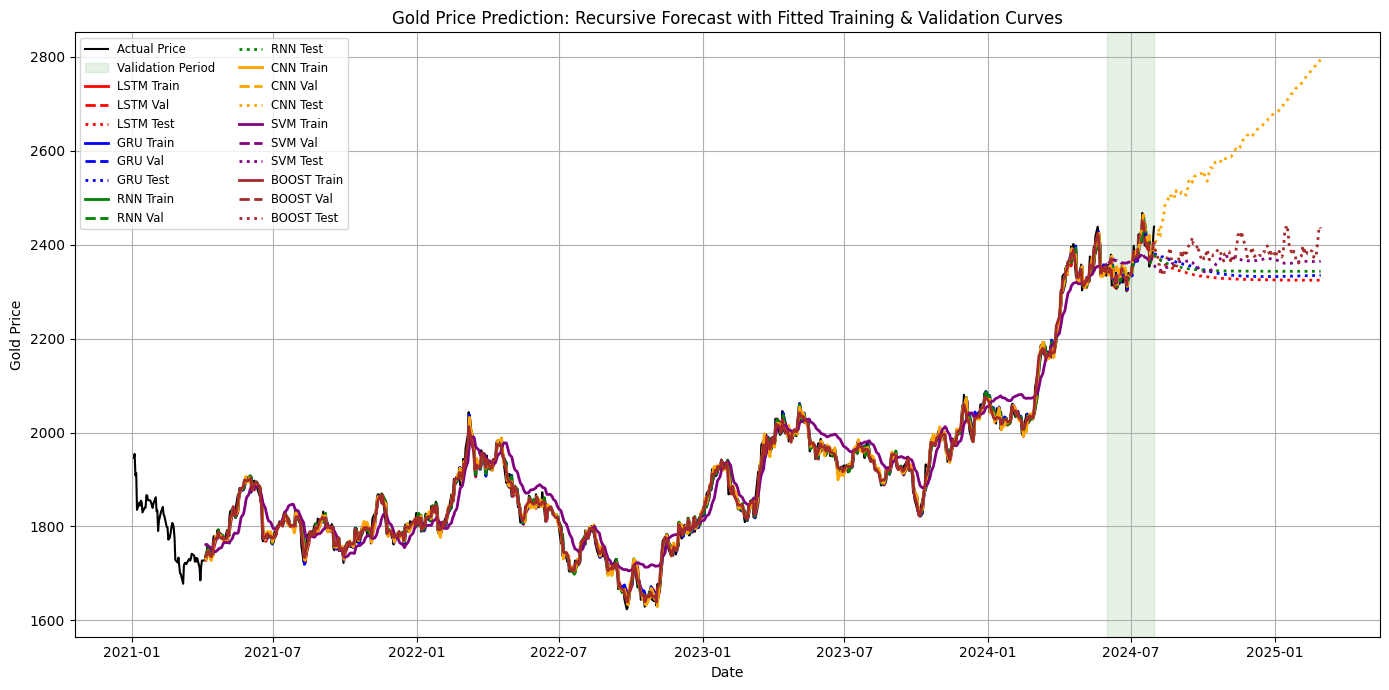

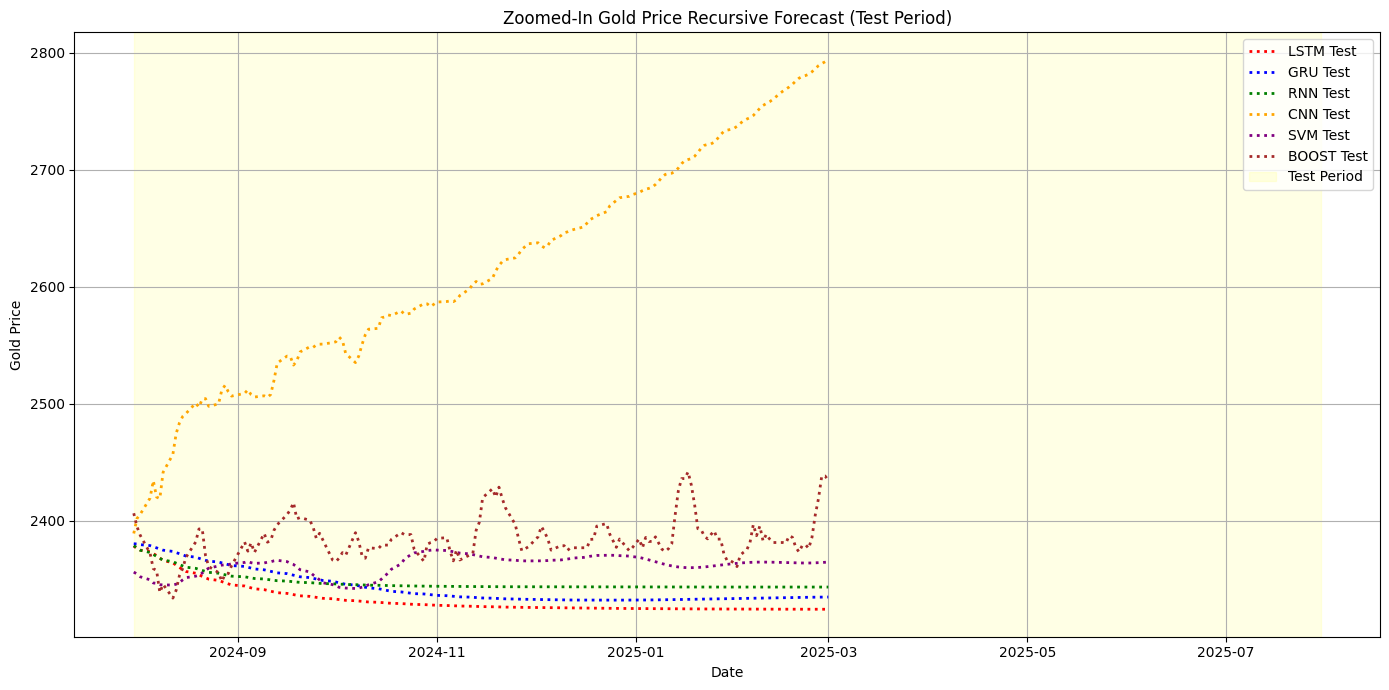

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import matplotlib.dates as mdates
import joblib  # For saving/loading scikit-learn models

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

### DATA LOADING, CLEANING, AND PREPARATION ###
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling: scale all four features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 65  # adjust as needed

# Prepare sequences:
# Each sample: the previous window_width days (shape: (window_width, 4))
# Target: the 4-dimensional vector of the day immediately following.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i])
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# --- Split data into training, validation, and test sets ---
# Training: dates before 2024-06-01.
# Validation: dates from 2024-06-01 (inclusive) to 2024-07-31 (non-inclusive).
# Test: dates from 2024-07-31 to 2025-03-01.
train_mask = all_dates < pd.to_datetime('2024-06-01')
val_mask   = (all_dates >= pd.to_datetime('2024-06-01')) & (all_dates < pd.to_datetime('2024-07-31'))
test_mask  = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
val_dates   = all_dates[val_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the NN models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float()
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders for training and validation
batch_size = 32  # adjust as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### MODEL DEFINITION (NEURAL NETWORK MODELS) ###
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # (batch, window_width, 4) -> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # use the output from the last time step
            out = self.fc(out)
        return out  # shape: (batch, 4)

### EARLY STOPPING CLASS ###
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

### TRAINING FUNCTION FOR NEURAL MODELS ###
def train_and_evaluate(model_name, train_loader, val_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 1500
    best_val_loss = float('inf')
    
    best_model_path = f'best_model_{model_name}_4d.pt'
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    else:
        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                preds = model(X_batch)
                loss = criterion(preds, y_batch)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            avg_train_loss = np.mean(train_losses)
            
            # Evaluate on validation set:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    preds = model(X_batch)
                    loss = criterion(preds, y_batch)
                    val_losses.append(loss.item())
            avg_val_loss = np.mean(val_losses)
            
            scheduler.step(avg_val_loss)
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
                break
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), best_model_path)
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'[{model_name}] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
        model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

# --- Fine-tuning function: retrain on training+validation data ---
def fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.HuberLoss()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = model(X_train_val_tensor.to(device))
        loss = criterion(preds, y_train_val_tensor.to(device))
        loss.backward()
        optimizer.step()
    return model

### RECURSIVE FORECASTING FUNCTIONS ###
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Recursively forecast the next 'forecast_horizon' days using a PyTorch model.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        with torch.no_grad():
            pred = model(input_tensor)
        pred = pred.squeeze(0)
        preds.append(pred.cpu().numpy())
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)

def recursive_forecast_sklearn(model, initial_window, forecast_horizon):
    """
    Recursively forecast the next 'forecast_horizon' days using a scikit-learn model.
    """
    current_window = initial_window.copy()
    preds = []
    for _ in range(forecast_horizon):
        X_input = current_window.flatten().reshape(1, -1)
        pred = model.predict(X_input)
        pred = pred.flatten()
        preds.append(pred)
        current_window = np.vstack((current_window[1:], pred))
    return np.array(preds)

### PREDICTION FUNCTIONS FOR ONE-STEP (FITTED) VALUES ###
def predict_nn(model, X_tensor, device):
    model.eval()
    with torch.no_grad():
        preds = model(X_tensor.to(device)).cpu().numpy()
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

def predict_sklearn(model, X, flatten=True):
    # X is expected in its original shape (n_samples, window_width, 4)
    if flatten:
        X_flat = X.reshape(X.shape[0], -1)
    else:
        X_flat = X
    preds = model.predict(X_flat)
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

### TRAIN AND PREDICT WITH NEURAL NETWORK MODELS ###
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
predictions_all = {}  # will hold predictions for 'train', 'val', 'test' for each model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Also form the training+validation set for fine-tuning:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
X_train_val_tensor = torch.from_numpy(X_train_val).float()
y_train_val_tensor = torch.from_numpy(y_train_val).float()

for model_name in neural_model_names:
    print(f"\nTraining (with validation) and fine-tuning for neural model: {model_name}")
    # Train using training and validation (with early stopping)
    model = train_and_evaluate(model_name, train_loader, val_loader)
    # Fine-tune on combined training+validation set:
    model = fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002)
    
    # Compute one-step predictions (fitted values) for training and validation:
    train_preds = predict_nn(model, X_train_tensor, device)
    val_preds   = predict_nn(model, X_val_tensor, device)
    # For test forecasting, use recursive forecasting.
    # Use the last window from the training+validation set (which are actual values) as the starting window.
    initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    forecast_horizon = len(test_dates)
    test_preds_rec = recursive_forecast(model, initial_window_nn, forecast_horizon, device)
    test_preds_rec_inv = scaler.inverse_transform(test_preds_rec)
    
    predictions_all[model_name] = {
        'train': train_preds[:, 0],  # predicted Price (first column)
        'val':   val_preds[:, 0],
        'test':  test_preds_rec_inv[:, 0]
    }

### TRAIN AND PREDICT WITH SVM AND BOOSTING MODELS (scikit-learn) ###
# For these, we now train on the combined training+validation data.
X_train_val_flat = np.concatenate((X_train, X_val), axis=0).reshape(-1, window_width*4)
y_train_val_flat = np.concatenate((y_train, y_val), axis=0)

# --- SVM ---
svm_model_path = 'best_model_SVM_4d.pt'
if os.path.exists(svm_model_path):
    svr = joblib.load(svm_model_path)
    print(f"Loaded existing SVM model from {svm_model_path}")
else:
    svr = MultiOutputRegressor(SVR(kernel='rbf'))
    svr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(svr, svm_model_path)
    
# One-step predictions for training and validation (flatten inputs):
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
train_preds_svm = predict_sklearn(svr, X_train, flatten=True)
val_preds_svm   = predict_sklearn(svr, X_val, flatten=True)
# For test forecasting, use recursive forecasting with the last window from training+validation.
X_train_val_np = np.concatenate((X_train, X_val), axis=0)
initial_window_np = X_train_val_np[-1]  # shape: (window_width, 4)
svr_test_rec = recursive_forecast_sklearn(svr, initial_window_np, len(test_dates))
svr_test_rec_inv = scaler.inverse_transform(svr_test_rec)

predictions_all['SVM'] = {
    'train': train_preds_svm[:, 0],
    'val':   val_preds_svm[:, 0],
    'test':  svr_test_rec_inv[:, 0]
}

# --- BOOSTING ---
boost_model_path = 'best_model_BOOST_4d.pt'
if os.path.exists(boost_model_path):
    gbr = joblib.load(boost_model_path)
    print(f"Loaded existing BOOST model from {boost_model_path}")
else:
    gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
    gbr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(gbr, boost_model_path)
    
train_preds_boost = predict_sklearn(gbr, X_train, flatten=True)
val_preds_boost   = predict_sklearn(gbr, X_val, flatten=True)
boost_test_rec = recursive_forecast_sklearn(gbr, initial_window_np, len(test_dates))
boost_test_rec_inv = scaler.inverse_transform(boost_test_rec)

predictions_all['BOOST'] = {
    'train': train_preds_boost[:, 0],
    'val':   val_preds_boost[:, 0],
    'test':  boost_test_rec_inv[:, 0]
}

### PLOTTING RESULTS ###
# First, get the actual prices (inverse-transformed) for the whole dataset.
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]

# Define colors for each model.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')

# Shade the validation period (2024-06-01 to 2024-07-31) with shallow green.
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),
            color='green', alpha=0.1, label='Validation Period')

# For each model, plot:
# - One-step predictions (fitted values) for the training period (solid line)
# - One-step predictions for the validation period (dashed line)
# - Recursive forecast for the test period (dotted line)
for model_name, preds in predictions_all.items():
    plt.plot(train_dates, preds['train'], color=model_colors.get(model_name, 'grey'),
             linestyle='-', linewidth=2, label=f'{model_name} Train')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optionally, you can also zoom in on the test period if desired.)
plt.figure(figsize=(14, 7))
for model_name, preds in predictions_all.items():
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
plt.title('Zoomed-In Gold Price Recursive Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


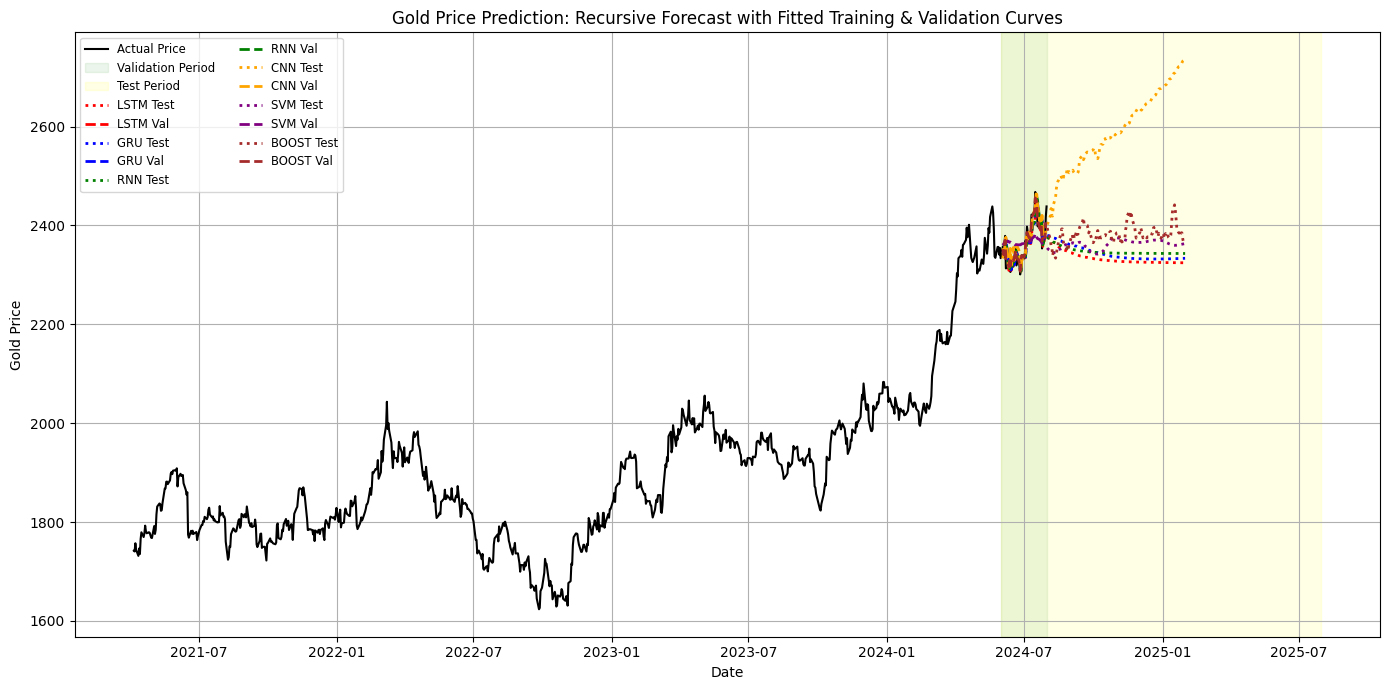

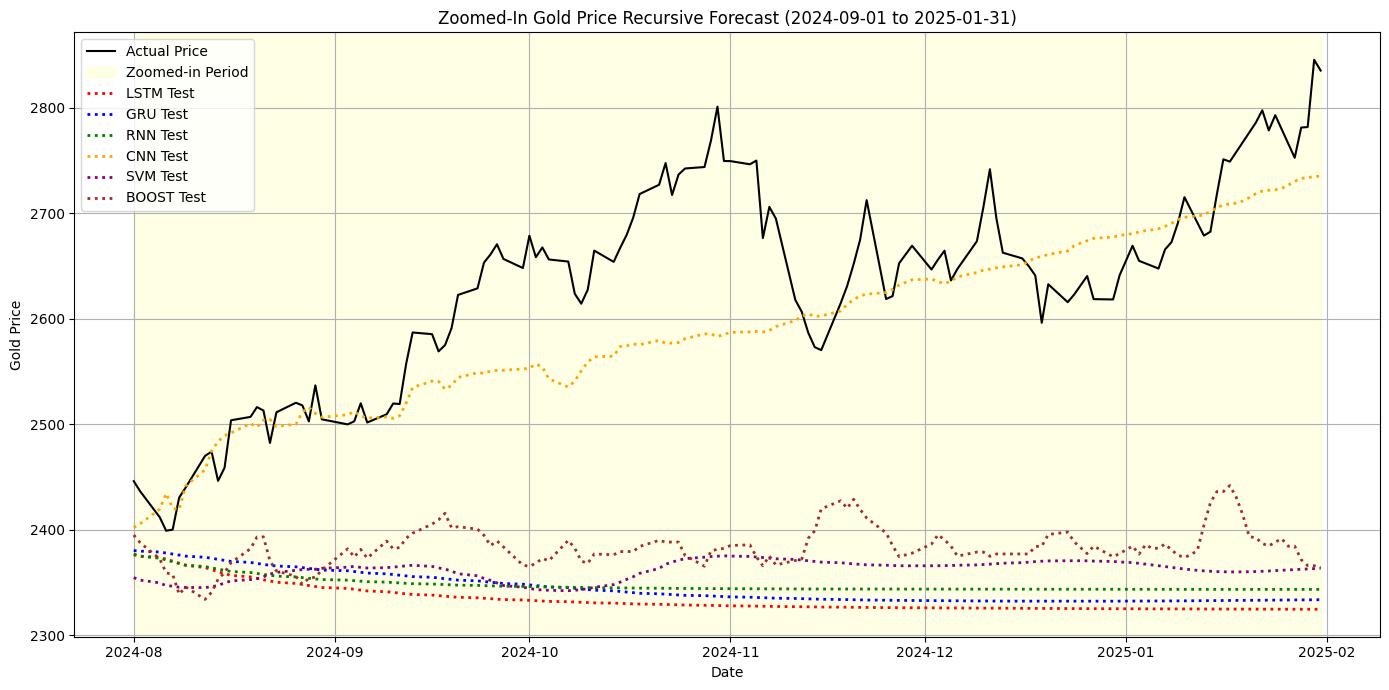

In [26]:
# --- Load the new CSV that contains the reference actual prices ---
df_new = pd.read_csv('Gold Futures Historical Data_3Yr.csv')
df_new.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new.sort_values(by='Date', ascending=True, inplace=True)
df_new.reset_index(drop=True, inplace=True)

# Transform columns to numeric values (same as before)
num_cols_new = df_new.columns.drop(['Date'])
df_new[num_cols_new] = df_new[num_cols_new].replace({',': ''}, regex=True)
df_new[num_cols_new] = df_new[num_cols_new].astype('float64')

# --- Extract the zoomed-in period actual prices ---
# Define the zoomed-in period (e.g., 2024-09-01 to 2025-01-31)
zoom_start = pd.to_datetime('2024-08-01')
zoom_end   = pd.to_datetime('2025-01-31')

# Filter the DataFrame to only include rows within the zoomed period.
mask_zoom = (df_new['Date'] >= zoom_start) & (df_new['Date'] <= zoom_end)
df_zoom   = df_new.loc[mask_zoom]

# Extract the dates and the reference prices from the new CSV.
test_reference_dates = df_zoom['Date'].values
test_reference_prices = df_zoom['Price'].values


# Prepare sequences and corresponding dates
X, y_full, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y_full.append(data_scaled[i, 0])  # Assuming 'Price' is the target
    dates.append(df['Date'].iloc[i])



X = np.array(X)
y_full = np.array(y_full)
full_dates = np.array(dates)
full_actual = inverse_transform(y_full)   # Save the actual price curve (e.g. shape (N_full,))


# Plot the entire dataset along with the recursive forecast from each model over the test window.
plt.figure(figsize=(14, 7))
# Plot actual prices (inverse transformed) for all dates.
#all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]
plt.plot(full_dates, full_actual, color='black', label='Actual Price')
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),color='green', alpha=0.08, label='Validation Period')
plt.axvspan(pd.to_datetime('2024-05-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')

model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}


mask_test_zoom = (test_dates >= zoom_start) & (test_dates <= zoom_end)
zoom_test_dates = test_dates[mask_test_zoom]

for model_name, preds in predictions_all.items():
    # Here we assume preds['test'] is an array of predicted prices for test_dates.
    zoom_model_preds = preds['test'][mask_test_zoom]  # filter predictions for the zoomed period
    plt.plot(zoom_test_dates, zoom_model_preds, color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')


plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Now, plot your predictions together with the zoomed-in actual prices ---
plt.figure(figsize=(14, 7))
# Plot the actual prices from the new CSV (black solid line)
plt.plot(test_reference_dates, test_reference_prices, color='black', label='Actual Price')

# (Optional) Highlight the zoomed region with a shallow color
plt.axvspan(zoom_start, zoom_end, color='yellow', alpha=0.1, label='Zoomed-in Period')

# Plot each model's test predictions (here, assumed to be stored in predictions_all)
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

# IMPORTANT: Ensure that your model predictions (e.g. predictions_all[model_name]['test'])
# are defined on dates that fall within (or can be matched to) the zoomed period.
# For example, if test_dates already covers the zoomed period, you can further filter:
mask_test_zoom = (test_dates >= zoom_start) & (test_dates <= zoom_end)
zoom_test_dates = test_dates[mask_test_zoom]

for model_name, preds in predictions_all.items():
    # Here we assume preds['test'] is an array of predicted prices for test_dates.
    zoom_model_preds = preds['test'][mask_test_zoom]  # filter predictions for the zoomed period
    plt.plot(zoom_test_dates, zoom_model_preds, color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Zoomed-In Gold Price Recursive Forecast (2024-09-01 to 2025-01-31)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


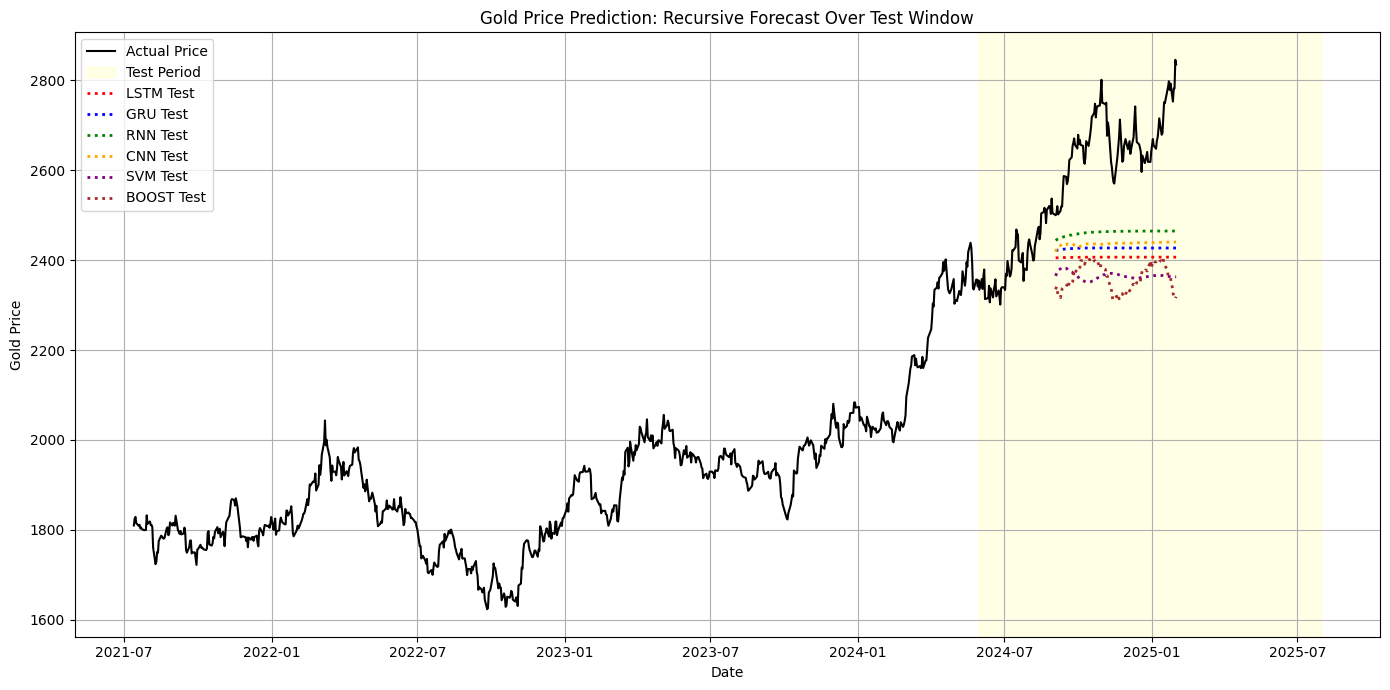

In [16]:
# Load and prepare data
df = pd.read_csv('Gold Futures Historical Data_3Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')


# Prepare sequences and corresponding dates
X, y_full, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y_full.append(data_scaled[i, 0])  # Assuming 'Price' is the target
    dates.append(df['Date'].iloc[i])



X = np.array(X)
y_full = np.array(y_full)
full_dates = np.array(dates)
full_actual = inverse_transform(y_full)   # Save the actual price curve (e.g. shape (N_full,))



### PLOTTING RESULTS ###
# Plot the entire dataset along with the recursive forecast from each model over the test window.
plt.figure(figsize=(14, 7))
# Plot actual prices (inverse transformed) for all dates.
#all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]
plt.plot(full_dates, full_actual, color='black', label='Actual Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-05-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
# Define colors for models.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

for model_name, preds in predictions_all.items():
    # Here we assume preds['test'] is an array of predicted prices for test_dates.
    zoom_model_preds = preds['test'][mask_test_zoom]  # filter predictions for the zoomed period
    plt.plot(zoom_test_dates, zoom_model_preds, color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')


plt.title('Gold Price Prediction: Recursive Forecast Over Test Window')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

### DATA LOADING, CLEANING, AND PREPARATION ###
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling: scale all four features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 28  # adjust as needed

# Prepare sequences:
# For each sample, we take the previous window_width days as input,
# and use the entire 4‑dimensional vector of the day immediately following as the target.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])   # shape: (window_width, 4)
    y.append(data_scaled[i])                      # target: 4-dimensional vector
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# Split data into training and test sets based on date.
# Training: all dates before 2024-07-31; Test: from 2024-07-31 to 2025-03-01.
train_mask = all_dates < pd.to_datetime('2024-07-31')
test_mask   = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the NN models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()  # shape: (N, 4)
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders (for training the NN models)
batch_size = 32  # adjust as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # sequential order

### MODEL DEFINITION (NEURAL NETWORK MODELS) ###
# The model is modified so that its final layer outputs 4 values.
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)  # output 4 values
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # x shape: (batch, window_width, 4) -> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            # For LSTM, GRU, and RNN:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # last time step output
            out = self.fc(out)
        return out  # shape: (batch, 4)

### EARLY STOPPING CLASS ###
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

### TRAINING FUNCTION FOR NEURAL MODELS ###
def train_and_evaluate(model_name):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 300
    best_train_loss = float('inf')
    
    # Use a new checkpoint filename to avoid loading incompatible weights.
    best_model_path = f'best_model_{model_name}_4d.pt'
    
    # Load existing model if available
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            preds = model(X_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        scheduler.step(avg_train_loss)
        early_stopping(avg_train_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        if avg_train_loss < best_train_loss:
            best_train_loss = avg_train_loss
            torch.save(model.state_dict(), best_model_path)
        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.6f}')
    
    # Load the best model
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

### RECURSIVE FORECASTING FUNCTION FOR NEURAL MODELS ###
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Recursively predict the next 'forecast_horizon' days using a PyTorch model.
    
    Parameters:
        model: trained PyTorch model.
        initial_window: a torch.Tensor of shape (window_width, 4) representing the last known window.
        forecast_horizon: number of days to forecast.
        device: torch device.
        
    Returns:
        predictions: a NumPy array of shape (forecast_horizon, 4) containing the forecasted values.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)  # shape: (window_width, 4)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)  # shape: (1, window_width, 4)
        with torch.no_grad():
            pred = model(input_tensor)  # shape: (1, 4)
        pred = pred.squeeze(0)  # shape: (4,)
        preds.append(pred.cpu().numpy())
        # Form next window: remove the first row and append the new prediction row.
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)  # shape: (forecast_horizon, 4)

### RECURSIVE FORECASTING FUNCTION FOR SKLEARN MODELS (SVM & BOOST) ###
def recursive_forecast_sklearn(model, initial_window, forecast_horizon):
    """
    Recursively predict the next 'forecast_horizon' days using a scikit-learn model.
    
    Parameters:
        model: trained scikit-learn model.
        initial_window: a NumPy array of shape (window_width, 4) representing the last known window.
        forecast_horizon: number of days to forecast.
        
    Returns:
        predictions: a NumPy array of shape (forecast_horizon, 4) containing the forecasted values.
    """
    current_window = initial_window.copy()  # shape: (window_width, 4)
    preds = []
    for _ in range(forecast_horizon):
        # Flatten the current window: shape becomes (1, window_width*4)
        X_input = current_window.flatten().reshape(1, -1)
        pred = model.predict(X_input)  # shape: (1, 4)
        pred = pred.flatten()  # shape: (4,)
        preds.append(pred)
        # Update the current window by removing the oldest day and appending the prediction.
        current_window = np.vstack((current_window[1:], pred))
    return np.array(preds)  # shape: (forecast_horizon, 4)

### TRAIN AND FORECAST WITH MULTIPLE MODELS ###

# Dictionary to store forecasted prices (first column) for each model.
all_forecasts = {}

# ----- Neural Network Models -----
# Only use LSTM, GRU, RNN, and CNN.
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
for model_name in neural_model_names:
    print(f"\nTraining and forecasting with neural model: {model_name}")
    model = train_and_evaluate(model_name)
    # Use the last training window as the initial window for recursive forecasting.
    initial_window = X_train_tensor[-1]  # shape: (window_width, 4)
    forecast_horizon = len(test_dates)     # forecast for each day in the test period
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    test_preds_scaled = recursive_forecast(model, initial_window, forecast_horizon, device)
    test_preds_inv = scaler.inverse_transform(test_preds_scaled)
    predicted_prices = test_preds_inv[:, 0]  # take the predicted 'Price' (first column)
    all_forecasts[model_name] = predicted_prices

# ----- SVM and Boosting Models (scikit-learn) -----
# For these models, we need to flatten the input window.
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # shape: (num_samples, window_width*4)

# SVM
print("\nTraining SVM model...")
svr = MultiOutputRegressor(SVR(kernel='rbf'))
svr.fit(X_train_flat, y_train)
# Use the last training window (as a numpy array) for recursive forecasting.
initial_window_np = X_train[-1]  # shape: (window_width, 4)
forecast_horizon = len(test_dates)
svr_preds_scaled = recursive_forecast_sklearn(svr, initial_window_np, forecast_horizon)
svr_preds_inv = scaler.inverse_transform(svr_preds_scaled)
all_forecasts['SVM'] = svr_preds_inv[:, 0]  # predicted Price

# Boosting (using Gradient Boosting Regressor)
print("\nTraining Boosting model...")
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
gbr.fit(X_train_flat, y_train)
gbr_preds_scaled = recursive_forecast_sklearn(gbr, initial_window_np, forecast_horizon)
gbr_preds_inv = scaler.inverse_transform(gbr_preds_scaled)
all_forecasts['BOOST'] = gbr_preds_inv[:, 0]  # predicted Price

### PLOTTING RESULTS ###
plt.figure(figsize=(14, 7))
# Plot actual prices (inverse transformed) for all dates.
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
# Define colors for models.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}
# Plot forecast from each model.
for model_name, forecast in all_forecasts.items():
    plt.plot(test_dates, forecast, color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Forecast')
plt.title('Gold Price Prediction: Recursive Forecast Over Test Window')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in Plot (from 2024-07-31 to 2025-03-01)
plt.figure(figsize=(14, 7))
for model_name, forecast in all_forecasts.items():
    plt.plot(test_dates, forecast, color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Forecast')
plt.title('Zoomed-In Gold Price Recursive Forecast (2024-07-31 to 2025-03-01)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training and forecasting with neural model: LSTM
Loaded existing model for LSTM from best_model_LSTM_4d.pt
[LSTM] Epoch 1/300, Train Loss: 0.000202, Val Loss: 0.000258


/tmp/ipykernel_1546349/2920389505.py:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[LSTM] Epoch 100/300, Train Loss: 0.000124, Val Loss: 0.000297
Early stopping triggered
[LSTM] Early stopping at epoch 154

Training and forecasting with neural model: GRU
Loaded existing model for GRU from best_model_GRU_4d.pt
[GRU] Epoch 1/300, Train Loss: 0.000162, Val Loss: 0.000248


/tmp/ipykernel_1546349/2920389505.py:223: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))
/tmp/ipykerne

[GRU] Epoch 100/300, Train Loss: 0.000132, Val Loss: 0.000585
Early stopping triggered
[GRU] Early stopping at epoch 164

Training and forecasting with neural model: RNN
Loaded existing model for RNN from best_model_RNN_4d.pt
[RNN] Epoch 1/300, Train Loss: 0.000283, Val Loss: 0.000440


/tmp/ipykernel_1546349/2920389505.py:223: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))
/tmp/ipykerne

[RNN] Epoch 100/300, Train Loss: 0.000290, Val Loss: 0.000418
Early stopping triggered
[RNN] Early stopping at epoch 159

Training and forecasting with neural model: CNN
Loaded existing model for CNN from best_model_CNN_4d.pt
[CNN] Epoch 1/300, Train Loss: 0.000180, Val Loss: 0.000320


/tmp/ipykernel_1546349/2920389505.py:223: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))
/tmp/ipykerne

[CNN] Epoch 100/300, Train Loss: 0.000151, Val Loss: 0.000362
Early stopping triggered
[CNN] Early stopping at epoch 162

Training SVM model...

Training Boosting model...


/tmp/ipykernel_1546349/2920389505.py:223: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


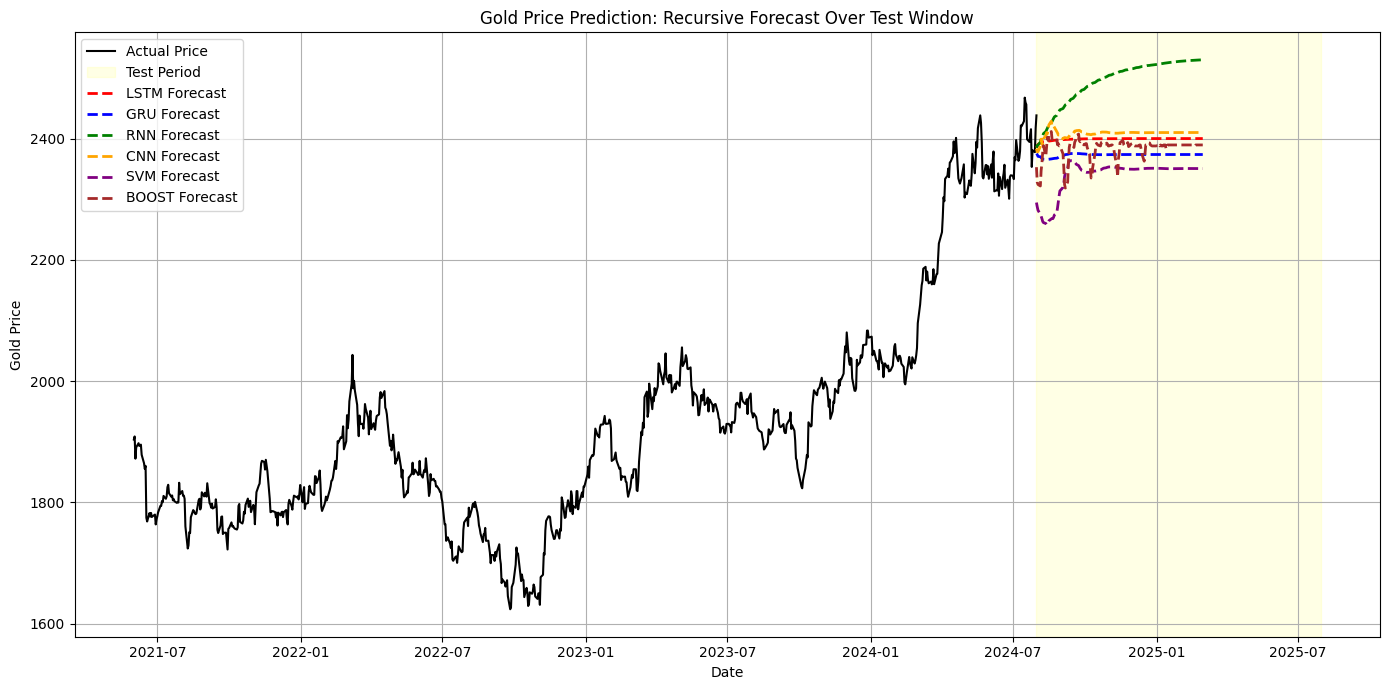

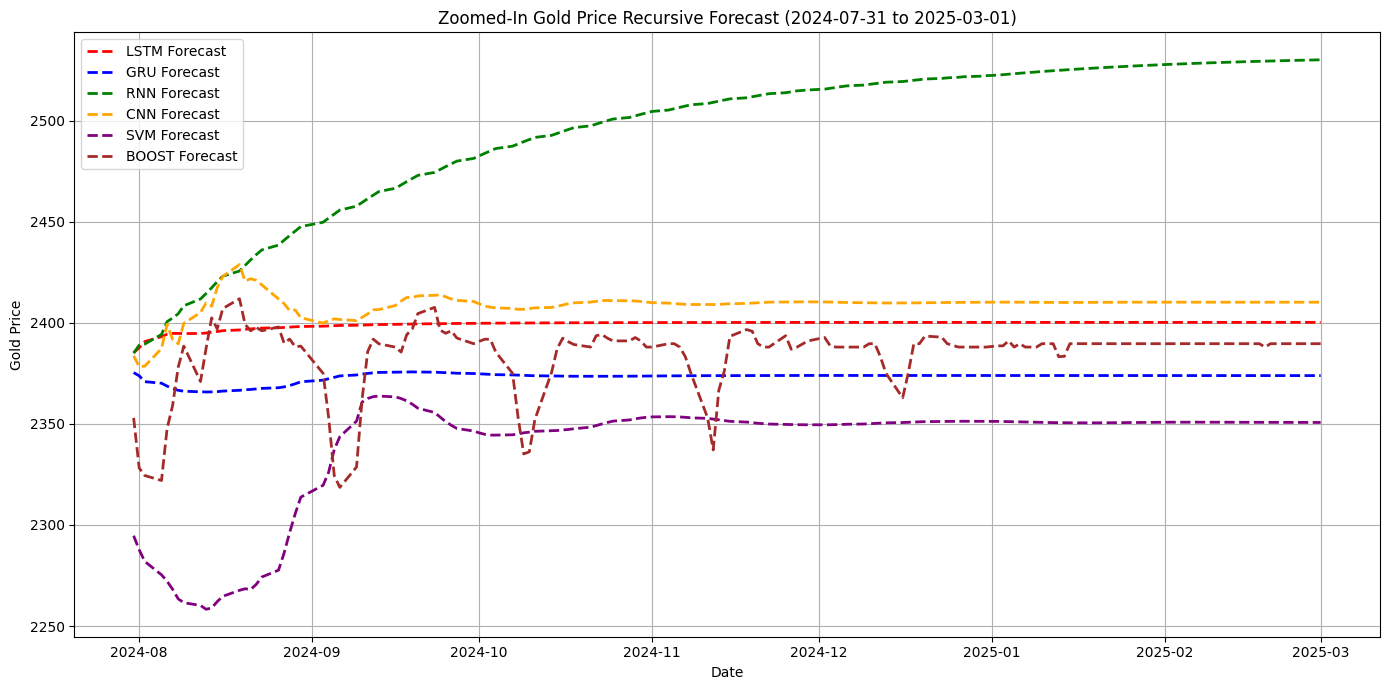

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

### DATA LOADING, CLEANING, AND PREPARATION ###
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling: scale all four features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 28  # adjust as needed

# Prepare sequences:
# For each sample, we take the previous window_width days as input,
# and use the entire 4‑dimensional vector of the day immediately following as the target.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])   # shape: (window_width, 4)
    y.append(data_scaled[i])                      # target: 4-dimensional vector
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# Split data into training, validation, and test sets based on date.
# Training: all dates before 2024-06-01.
# Validation: dates from 2024-06-01 up to (but not including) 2024-07-31.
# Test: dates from 2024-07-31 to 2025-03-01.
train_mask = all_dates < pd.to_datetime('2024-06-01')
val_mask   = (all_dates >= pd.to_datetime('2024-06-01')) & (all_dates < pd.to_datetime('2024-07-31'))
test_mask  = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
val_dates   = all_dates[val_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the NN models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float()
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders for training and validation (for NN models)
batch_size = 32  # adjust as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### MODEL DEFINITION (NEURAL NETWORK MODELS) ###
# The model is modified so that its final layer outputs 4 values.
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # x shape: (batch, window_width, 4) -> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # take the output of the last time step
            out = self.fc(out)
        return out  # shape: (batch, 4)

### EARLY STOPPING CLASS ###
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

### TRAINING FUNCTION FOR NEURAL MODELS ###
def train_and_evaluate(model_name, val_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 300
    best_val_loss = float('inf')
    
    best_model_path = f'best_model_{model_name}_4d.pt'
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            preds = model(X_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        
        # Evaluate on validation set
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                preds = model(X_batch)
                loss = criterion(preds, y_batch)
                val_losses.append(loss.item())
        avg_val_loss = np.mean(val_losses)
        
        scheduler.step(avg_val_loss)
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_model_path)
        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
    
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

### RECURSIVE FORECASTING FUNCTION FOR NEURAL MODELS ###
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Recursively predict the next 'forecast_horizon' days using a PyTorch model.
    
    Parameters:
        model: trained PyTorch model.
        initial_window: a torch.Tensor of shape (window_width, 4) representing the last known window.
        forecast_horizon: number of days to forecast.
        device: torch device.
        
    Returns:
        predictions: a NumPy array of shape (forecast_horizon, 4) containing the forecasted values.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)  # shape: (1, window_width, 4)
        with torch.no_grad():
            pred = model(input_tensor)
        pred = pred.squeeze(0)
        preds.append(pred.cpu().numpy())
        # Slide the window: remove the first day and append the new prediction.
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)

### RECURSIVE FORECASTING FUNCTION FOR SKLEARN MODELS (SVM & BOOST) ###
def recursive_forecast_sklearn(model, initial_window, forecast_horizon):
    """
    Recursively predict the next 'forecast_horizon' days using a scikit-learn model.
    
    Parameters:
        model: trained scikit-learn model.
        initial_window: a NumPy array of shape (window_width, 4) representing the last known window.
        forecast_horizon: number of days to forecast.
        
    Returns:
        predictions: a NumPy array of shape (forecast_horizon, 4) containing the forecasted values.
    """
    current_window = initial_window.copy()
    preds = []
    for _ in range(forecast_horizon):
        # Flatten the current window: shape becomes (1, window_width*4)
        X_input = current_window.flatten().reshape(1, -1)
        pred = model.predict(X_input)
        pred = pred.flatten()
        preds.append(pred)
        # Update current window by removing the oldest day and appending the new prediction.
        current_window = np.vstack((current_window[1:], pred))
    return np.array(preds)

### TRAIN AND FORECAST WITH MULTIPLE MODELS ###

# Dictionary to store forecasted prices (first column) for each model.
all_forecasts = {}

# ----- Neural Network Models -----
# Only use LSTM, GRU, RNN, and CNN.
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
for model_name in neural_model_names:
    print(f"\nTraining and forecasting with neural model: {model_name}")
    # Train the model using the training set and validate on the validation set.
    model = train_and_evaluate(model_name, val_loader)
    # For forecasting, use the last available window from the union of training and validation sets.
    X_train_val = np.concatenate((X_train, X_val), axis=0)
    initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    forecast_horizon = len(test_dates)  # forecast for each day in the test period
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    test_preds_scaled = recursive_forecast(model, initial_window_nn, forecast_horizon, device)
    test_preds_inv = scaler.inverse_transform(test_preds_scaled)
    predicted_prices = test_preds_inv[:, 0]  # use the predicted 'Price' (first column)
    all_forecasts[model_name] = predicted_prices

# ----- SVM and Boosting Models (scikit-learn) -----
# For these models, we train using the training set only (X_train) and then forecast using the last window
# from the union of training and validation data.
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # flatten training input

# SVM
print("\nTraining SVM model...")
svr = MultiOutputRegressor(SVR(kernel='rbf'))
svr.fit(X_train_flat, y_train)
# Use the last available window from training+validation for forecasting.
X_train_val_np = np.concatenate((X_train, X_val), axis=0)
initial_window_np = X_train_val_np[-1]  # shape: (window_width, 4)
forecast_horizon = len(test_dates)
svr_preds_scaled = recursive_forecast_sklearn(svr, initial_window_np, forecast_horizon)
svr_preds_inv = scaler.inverse_transform(svr_preds_scaled)
all_forecasts['SVM'] = svr_preds_inv[:, 0]

# Boosting (using Gradient Boosting Regressor)
print("\nTraining Boosting model...")
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
gbr.fit(X_train_flat, y_train)
gbr_preds_scaled = recursive_forecast_sklearn(gbr, initial_window_np, forecast_horizon)
gbr_preds_inv = scaler.inverse_transform(gbr_preds_scaled)
all_forecasts['BOOST'] = gbr_preds_inv[:, 0]

### PLOTTING RESULTS ###
plt.figure(figsize=(14, 7))
# Plot actual prices (inverse-transformed) for all dates.
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
# Define colors for models.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}
# Plot forecast from each model.
for model_name, forecast in all_forecasts.items():
    plt.plot(test_dates, forecast, color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Forecast')
plt.title('Gold Price Prediction: Recursive Forecast Over Test Window')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in Plot (from 2024-07-31 to 2025-03-01)
plt.figure(figsize=(14, 7))
for model_name, forecast in all_forecasts.items():
    plt.plot(test_dates, forecast, color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Forecast')
plt.title('Zoomed-In Gold Price Recursive Forecast (2024-07-31 to 2025-03-01)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training and forecasting with model: LSTM
[LSTM] Epoch 1/300, Training Loss: 0.013157
[LSTM] Epoch 100/300, Training Loss: 0.000393
[LSTM] Epoch 200/300, Training Loss: 0.000193
[LSTM] Epoch 300/300, Training Loss: 0.000171

Training and forecasting with model: GRU
[GRU] Epoch 1/300, Training Loss: 0.009656


/tmp/ipykernel_1535867/595138861.py:219: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[GRU] Epoch 100/300, Training Loss: 0.000276
[GRU] Epoch 200/300, Training Loss: 0.000184
[GRU] Epoch 300/300, Training Loss: 0.000180

Training and forecasting with model: RNN
[RNN] Epoch 1/300, Training Loss: 0.014068


/tmp/ipykernel_1535867/595138861.py:219: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[RNN] Epoch 100/300, Training Loss: 0.000255
[RNN] Epoch 200/300, Training Loss: 0.000293
[RNN] Epoch 300/300, Training Loss: 0.000196

Training and forecasting with model: CNN
[CNN] Epoch 1/300, Training Loss: 0.008721


/tmp/ipykernel_1535867/595138861.py:219: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[CNN] Epoch 100/300, Training Loss: 0.000514
[CNN] Epoch 200/300, Training Loss: 0.000283
[CNN] Epoch 300/300, Training Loss: 0.000320


/tmp/ipykernel_1535867/595138861.py:219: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


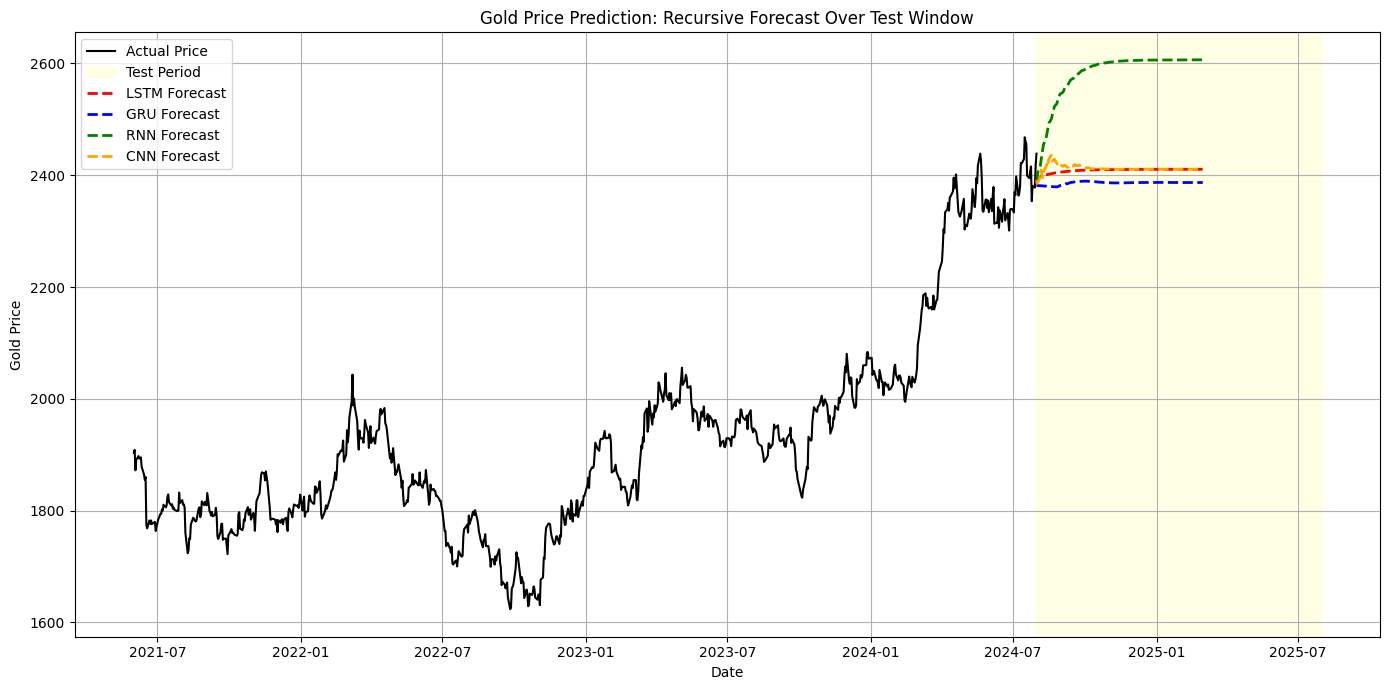

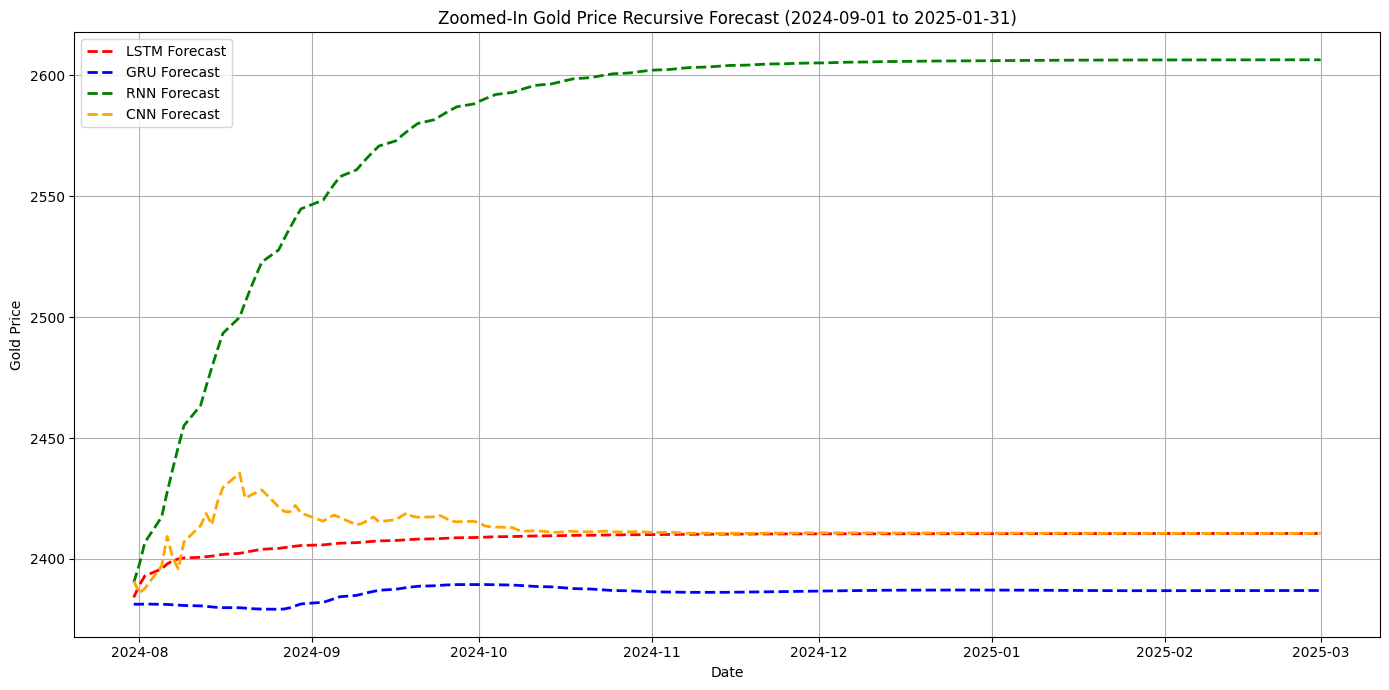

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

### DATA LOADING, CLEANING, AND PREPARATION ###
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Check for duplicates and nulls
#assert df.duplicated().sum() == 0, "Duplicate rows found!"
#assert df.isnull().sum().sum() == 0, "Missing values found!"

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling: scale all four features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 28  # adjust as needed

# Prepare sequences:
# For each sample, we take the previous window_width days as input,
# and use the entire 4‑dimensional vector of the day immediately following as the target.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])   # shape: (window_width, 4)
    y.append(data_scaled[i])                      # target: 4-dimensional vector
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# Split data into training and test sets based on date.
# Training: all dates before 2024-09-01; Test: from 2024-09-01 onward.
train_mask = all_dates < pd.to_datetime('2024-07-31')
#test_mask  = all_dates >= pd.to_datetime('2025-01-01')
test_mask   = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()  # shape: (N, 4)
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders (for training only)
batch_size = 32  # adjust as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # sequential order

### MODEL DEFINITION ###
# The model is modified so that its final layer outputs 4 values.
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)  # output 4 values
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        elif model_type == 'EnhancedLSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=3,
                batch_first=True,
                dropout=0.2,
            )
            self.dropout = nn.Dropout(0.2)
            self.bn = nn.BatchNorm1d(128)
            self.fc = nn.Linear(128, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # x shape: (batch, window_width, 4) -> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)

        else:
            # For LSTM, GRU, and RNN:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # last time step output
            out = self.fc(out)
        return out  # shape: (batch, 4)

### EARLY STOPPING CLASS ###
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

### TRAINING FUNCTION ###
def train_and_evaluate(model_name):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 300
    best_train_loss = float('inf')
    
    # Use a new checkpoint filename to avoid loading incompatible weights.
    best_model_path = f'best_model_{model_name}_4d.pt'
    
    # Load existing model if available
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            preds = model(X_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        scheduler.step(avg_train_loss)
        early_stopping(avg_train_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        if avg_train_loss < best_train_loss:
            best_train_loss = avg_train_loss
            torch.save(model.state_dict(), best_model_path)
        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.6f}')
    
    # Load the best model
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

### RECURSIVE FORECASTING FUNCTION ###
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Recursively predict the next 'forecast_horizon' days.
    
    Parameters:
        model: trained model.
        initial_window: a torch.Tensor of shape (window_width, 4) representing the last known window.
        forecast_horizon: number of days to forecast.
        device: torch device.
        
    Returns:
        predictions: a NumPy array of shape (forecast_horizon, 4) containing the forecasted values.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)  # shape: (window_width, 4)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)  # shape: (1, window_width, 4)
        with torch.no_grad():
            pred = model(input_tensor)  # shape: (1, 4)
        pred = pred.squeeze(0)  # shape: (4,)
        preds.append(pred.cpu().numpy())
        # Form next window: remove the first row and append the new prediction row.
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)  # shape: (forecast_horizon, 4)

### TRAIN AND FORECAST WITH MULTIPLE MODELS ###
model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
all_forecasts = {}  # dictionary to store forecasted prices (first column) for each model

for model_name in model_names:
    print(f"\nTraining and forecasting with model: {model_name}")
    model = train_and_evaluate(model_name)
    # Use the last training window as the initial window for recursive forecasting.
    initial_window = X_train_tensor[-1]  # shape: (window_width, 4)
    forecast_horizon = len(test_dates)     # forecast for each day in the test period
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    test_preds_scaled = recursive_forecast(model, initial_window, forecast_horizon, device)
    test_preds_inv = scaler.inverse_transform(test_preds_scaled)
    predicted_prices = test_preds_inv[:, 0]  # take the predicted 'Price' (first column)
    all_forecasts[model_name] = predicted_prices

### PLOTTING RESULTS ###
# Plot the entire dataset along with the recursive forecast from each model over the test window.
plt.figure(figsize=(14, 7))
# Plot actual prices (inverse transformed) for all dates.
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
# Define colors for models.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
}
# Plot forecast from each model.
for model_name, forecast in all_forecasts.items():
    plt.plot(test_dates, forecast, color=model_colors[model_name], linestyle='--', linewidth=2, label=f'{model_name} Forecast')
plt.title('Gold Price Prediction: Recursive Forecast Over Test Window')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in Plot (starting from 2024-09-01)
plt.figure(figsize=(14, 7))
for model_name, forecast in all_forecasts.items():
    plt.plot(test_dates, forecast, color=model_colors[model_name], linestyle='--', linewidth=2, label=f'{model_name} Forecast')
plt.title('Zoomed-In Gold Price Recursive Forecast (2024-09-01 to 2025-01-31)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()